**Executed:** Mon Oct  3 18:00:50 2016

**Duration:** 3 seconds.

# Fit Gamma factor

> *This notebook estimates the gamma factor from a set of 5 μs-ALEX smFRET measurements.*

## What this notebook does?

According to [Lee 2005](http://dx.doi.org/10.1529/biophysj.104.054114) ([PDF](http://www.chem.ucla.edu/~michalet/papers/BJ2005.pdf), [SI PDF](http://www.chem.ucla.edu/~michalet/papers/BJ2005SI.pdf)), we estimate the $\gamma$-factor 
from Proximity Ratio (PR) and S values (with background, leakage and direct excitation correction) 
for a set of 5 μs-ALEX measurements.

The PR and S values are computed by the notebook

- [usALEX-5samples-PR-leakage-dir-ex-all-ph](usALEX-5samples-PR-leakage-dir-ex-all-ph.ipynb)

which is executed by [8-spots paper analysis](8-spots paper analysis.ipynb).

From [Lee 2005](http://dx.doi.org/10.1529/biophysj.104.054114) (equation 20), the following linear relation holds:

$$\frac{1}{S} = \Omega + \Sigma \cdot E_{PR}$$

Once $\Omega$ and $\Sigma$ are fitted, we can compute the $\gamma$-factor as ([equation 22](http://www.sciencedirect.com/science/article/pii/S0006349505733464#eq22)):

$$\gamma = (\Omega-1)/(\Omega + \Sigma-1)$$

$$\beta = \Omega + \Sigma - 1$$

The definition of $\beta$ based on physical parameters is:

$$ \beta = \frac{I_{A_{ex}}\sigma_{A_{ex}}^A}{I_{D_{ex}}\sigma_{D_{ex}}^D}$$

Note that, calling $S_\gamma$ the corrected S, the following relation holds:

$$ S_\gamma = (1 + \beta)^{-1}$$


## Import libraries

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import lmfit
from scipy.stats import linregress

## Computation

This notebook read data from the file:

In [2]:
data_file = 'results/usALEX-5samples-PR-leakage-dir-ex-all-ph.csv'

In [3]:
data = pd.read_csv(data_file).set_index('sample')
data

,n_bursts_all,n_bursts_do,n_bursts_fret,E_kde_w,E_gauss_w,E_gauss_w_sig,E_gauss_w_err,S_kde,S_gauss,S_gauss_sig,S_gauss_err,E_pr_do_kde,nt_mean
sample,,,,,,,,,,,,,
7d,1172,586,543,0.9304,0.925842,0.059539,0.002555,0.5512,0.550639,0.099496,0.004270,0.0020,22.227823
12d,1307,329,948,0.7440,0.731546,0.091896,0.002985,0.5748,0.557524,0.105052,0.003412,0.0160,22.002399
17d,2489,463,1964,0.4320,0.427114,0.113675,0.002565,0.5434,0.537124,0.112882,0.002547,0.0128,21.193171
22d,2054,319,1673,0.1804,0.184215,0.078951,0.001930,0.5414,0.542855,0.114988,0.002811,0.0000,23.016538
27d,791,160,590,0.0844,0.085372,0.070126,0.002887,0.5160,0.556065,0.115220,0.004744,-0.0088,16.830070


In [4]:
data[['E_gauss_w', 'E_kde_w', 'S_gauss']]

,E_gauss_w,E_kde_w,S_gauss
sample,,,
7d,0.925842,0.9304,0.550639
12d,0.731546,0.7440,0.557524
17d,0.427114,0.4320,0.537124
22d,0.184215,0.1804,0.542855
27d,0.085372,0.0844,0.556065


In [5]:
E_ref, S_ref = data.E_gauss_w, data.S_gauss

In [6]:
res = linregress(E_ref, 1/S_ref)
slope, intercept, r_val, p_val, stderr = res

For more info see [`scipy.stats.linearregress`](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.linregress.html).

In [7]:
Sigma = slope 
Sigma

-0.016699259417934667

In [8]:
Omega = intercept
Omega

1.8302518216216859

[Pearson correlation coefficient](http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient):

In [9]:
r_val

-0.20454313228224008

[Coefficient of determination](http://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$:

In [10]:
r_val**2

0.041837892963829962

P-value (to test the null hypothesis that the slope is zero):

In [11]:
p_val

0.7413951563057567

Gamma computed from the previous fitted values:

In [12]:
gamma = (Omega - 1)/(Omega + Sigma - 1)
'%.6f' % gamma

'1.020526'

In [13]:
with open('results/usALEX - gamma factor - all-ph.csv', 'w') as f:
    f.write('%.6f' % gamma)

In [14]:
beta = Omega + Sigma - 1
'%.6f' % beta

'0.813553'

In [15]:
with open('results/usALEX - beta factor - all-ph.csv', 'w') as f:
    f.write('%.6f' % beta)

# Fit plot

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

sns.set_style('whitegrid')

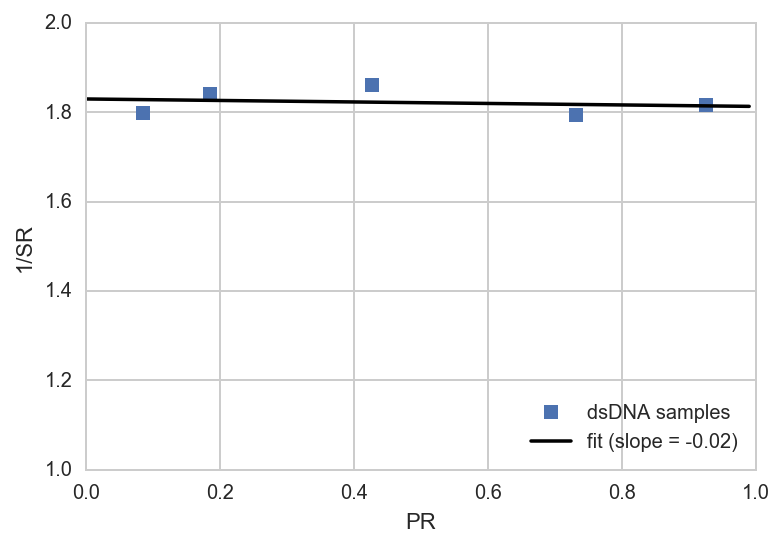

In [17]:
x = np.arange(0, 1, 0.01)
plt.plot(E_ref, 1/S_ref, 's', label='dsDNA samples')
plt.plot(x, intercept + slope*x, 'k', label='fit (slope = %.2f)' % slope)
plt.legend(loc=4)
plt.ylim(1, 2)
plt.xlabel('PR')
plt.ylabel('1/SR');